<a href="https://colab.research.google.com/github/cgrundman/ZTM-TensorFlow-Developer/blob/main/02_neural_network_classification_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercises for classification neural netowrks

In [1]:
from sklearn.datasets import make_moons

X , y = make_moons(n_samples=1000,
                   noise=0.03,
                   random_state=42)

In [2]:
# Check the features
X

array([[-0.00933187,  0.39098105],
       [ 0.95457387, -0.47375583],
       [ 0.9185256 , -0.42519648],
       ...,
       [ 1.65391483, -0.29179795],
       [-0.9341017 ,  0.35358221],
       [ 0.7968358 ,  0.60423662]])

In [3]:
# Check the labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [4]:
import pandas as pd
moons = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
moons

,X0,X1,label
0,-0.009332,0.390981,1
1,0.954574,-0.473756,1
2,0.918526,-0.425196,1
3,0.412768,-0.376385,1
4,-0.845320,0.528799,0
...,...,...,...
995,0.793018,0.591402,0
996,-0.138777,0.968000,0
997,1.653915,-0.291798,1
998,-0.934102,0.353582,0


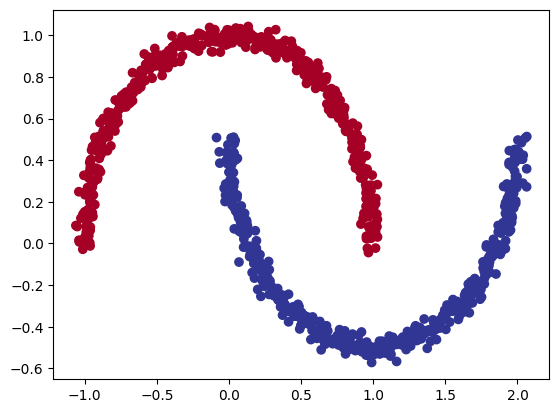

In [5]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [6]:
# Split data into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
len(X_train), len(X_test)

(800, 200)

## Build a model to fit the data

In [8]:
import tensorflow as tf

# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(X_train, y_train, epochs=10)

Epoch 1/10
25/25 [==============================] - 4s 10ms/step - loss: 0.7315 - accuracy: 0.4638
Epoch 2/10
25/25 [==============================] - 0s 10ms/step - loss: 0.6920 - accuracy: 0.5700
Epoch 3/10
25/25 [==============================] - 0s 9ms/step - loss: 0.6715 - accuracy: 0.6087
Epoch 4/10
25/25 [==============================] - 0s 7ms/step - loss: 0.6430 - accuracy: 0.6275
Epoch 5/10
25/25 [==============================] - 0s 9ms/step - loss: 0.5990 - accuracy: 0.6662
Epoch 6/10
25/25 [==============================] - 0s 5ms/step - loss: 0.5492 - accuracy: 0.8825
Epoch 7/10
25/25 [==============================] - 0s 5ms/step - loss: 0.5063 - accuracy: 0.8813
Epoch 8/10
25/25 [==============================] - 0s 5ms/step - loss: 0.4784 - accuracy: 0.8875
Epoch 9/10
25/25 [==============================] - 0s 3ms/step - loss: 0.4605 - accuracy: 0.8913
Epoch 10/10
25/25 [==============================] - 0s 3ms/step - loss: 0.4462 - accuracy: 0.8938


## Evaluate the model

In [9]:
model_1.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.4401 - accuracy: 0.8950


[0.44007596373558044, 0.8949999809265137]

Text(0.5, 1.0, 'Model_1 loss curves')

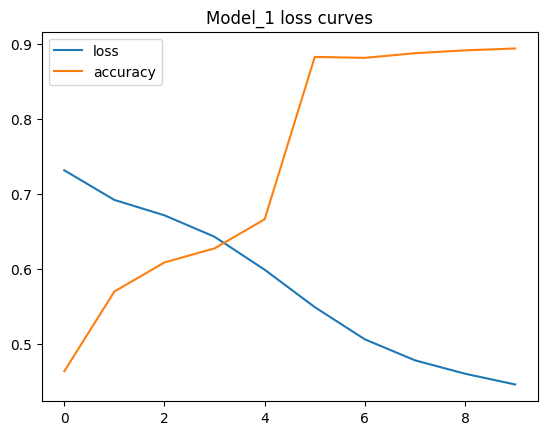

In [10]:
# Plot the loss curves
pd.DataFrame(history_1.history).plot()
plt.title("Model_1 loss curves")

In [11]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X value (we're going to make predictions )
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape our prediction to ge tthem ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshaope(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred.reshape(xx.shape))

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 1s 3ms/step
doing binary classification


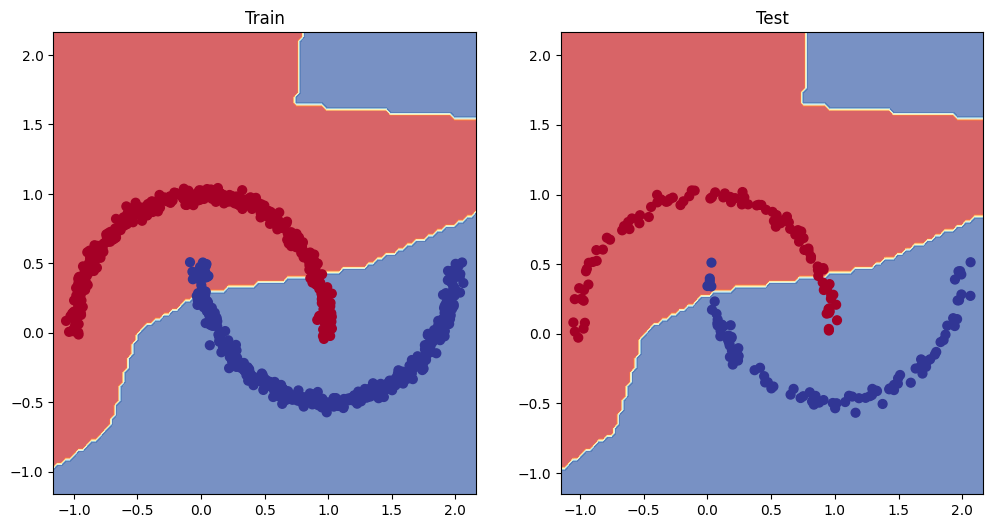

In [12]:
# Plot the desicion boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X=X_test, y=y_test)

## Tweak the model

Let's train for longer

In [13]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history_2 = model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 3s 6ms/step - loss: 0.7142 - accuracy: 0.4613
Epoch 2/100
25/25 [==============================] - 0s 9ms/step - loss: 0.6917 - accuracy: 0.4375
Epoch 3/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6641 - accuracy: 0.5038
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6242 - accuracy: 0.5863
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5694 - accuracy: 0.7538
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5202 - accuracy: 0.7788
Epoch 7/100
25/25 [==============================] - 0s 8ms/step - loss: 0.4855 - accuracy: 0.7937
Epoch 8/100
25/25 [==============================] - 0s 9ms/step - loss: 0.4593 - accuracy: 0.8163
Epoch 9/100
25/25 [==============================] - 0s 4ms/step - loss: 0.4383 - accuracy: 0.8338
Epoch 10/100
25/25 [==============================] - 0s 4ms/step - loss: 0.4173 - accuracy: 0.8512
Epoch 11/

## Evaluate model_2

In [14]:
model_2.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 3.3816e-04 - accuracy: 1.0000


[0.00033815595088526607, 1.0]

Text(0.5, 1.0, 'Model_2 loss curves')

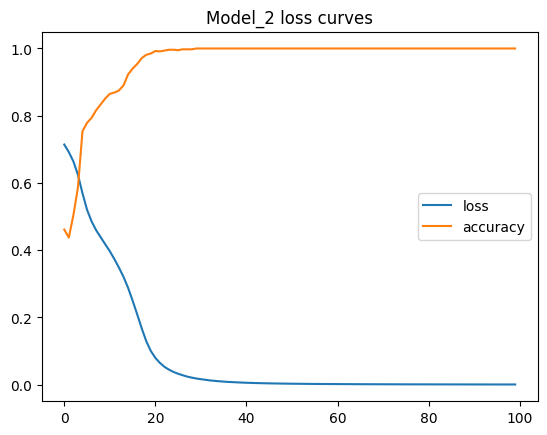

In [15]:
# Plot the loss curves
pd.DataFrame(history_2.history).plot()
plt.title("Model_2 loss curves")

313/313 [==============================] - 1s 3ms/step
doing binary classification
313/313 [==============================] - 1s 4ms/step
doing binary classification


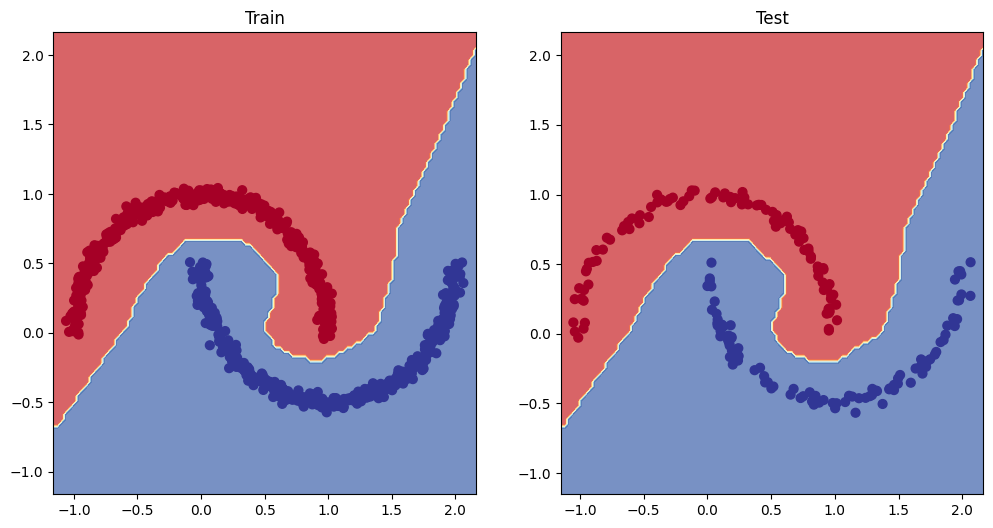

In [16]:
# Plot the desicion boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_2, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_2, X=X_test, y=y_test)

# Exercises with the fashion_mnist dataset

In [17]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test data for us.
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


## Let's train another model on this data

In [18]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        tf.one_hot(train_labels, depth=10),
                        epochs=20,
                        validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 2.0659 - accuracy: 0.1871 - val_loss: 1.8736 - val_accuracy: 0.2251
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7772 - accuracy: 0.2723 - val_loss: 1.6857 - val_accuracy: 0.3356
Epoch 3/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5643 - accuracy: 0.3280 - val_loss: 1.5106 - val_accuracy: 0.3179
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4828 - accuracy: 0.3419 - val_loss: 1.4708 - val_accuracy: 0.3365
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4498 - accuracy: 0.3516 - val_loss: 1.4408 - val_accuracy: 0.3556
Epoch 6/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.4123 - accuracy: 0.3836 - val_loss: 1.4139 - val_accuracy: 0.3707
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3727 - accuracy: 0.3995 - val_loss: 1.3641 - val_accuracy:

In [19]:
# Evaluate the data
model_3.evaluate(test_data, tf.one_hot(test_labels, depth=10))

313/313 [==============================] - 1s 2ms/step - loss: 1.3145 - accuracy: 0.4111


[1.3145363330841064, 0.41110000014305115]

Text(0.5, 1.0, 'Model_3 loss curves')

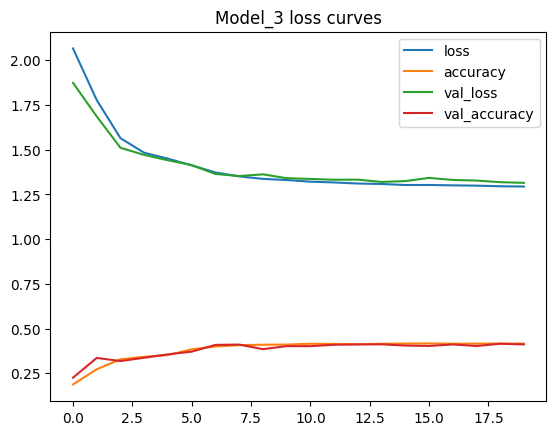

In [20]:
# Plot model training
pd.DataFrame(history_3.history).plot()
plt.title("Model_3 loss curves")

## Tweak the model

Let's add layers and depth

In [21]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
history_4 = model_4.fit(train_data,
                        tf.one_hot(train_labels, depth=10),
                        epochs=10,
                        validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.9337 - accuracy: 0.2604 - val_loss: 1.5335 - val_accuracy: 0.3380
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4176 - accuracy: 0.3675 - val_loss: 1.4043 - val_accuracy: 0.3545
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3310 - accuracy: 0.4005 - val_loss: 1.3256 - val_accuracy: 0.3917
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3148 - accuracy: 0.4034 - val_loss: 1.3242 - val_accuracy: 0.4145
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.3051 - accuracy: 0.4147 - val_loss: 1.3226 - val_accuracy: 0.4172
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2986 - accuracy: 0.4182 - val_loss: 1.3424 - val_accuracy: 0.3963
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2974 - accuracy: 0.4172 - val_loss: 1.3216 - val_accuracy:

In [22]:
# Evaluate the data
model_4.evaluate(test_data, tf.one_hot(test_labels, depth=10))

313/313 [==============================] - 1s 2ms/step - loss: 1.3060 - accuracy: 0.4266


[1.305981993675232, 0.42660000920295715]

Text(0.5, 1.0, 'Model_4 Loss Curves')

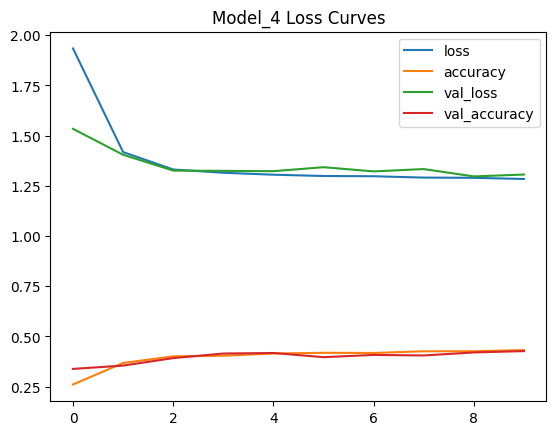

In [23]:
pd.DataFrame(history_4. history).plot()
plt.title("Model_4 Loss Curves")

## Let's train another model

Whoops! I forgot to normalize our data.

Lets normalize and find the best learning rate

In [24]:
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [29]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Create a callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-5 * 10**(epoch/20))

# Fit the model
history_5 = model_5.fit(train_data_norm,
                       tf.one_hot(train_labels, depth=10),
                       epochs=100,
                       validation_data=(test_data_norm, tf.one_hot(test_labels, depth=10)),
                       callbacks=[lr_scheduler])

Epoch 1/100
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2527 - accuracy: 0.1990 - val_loss: 2.2117 - val_accuracy: 0.2003 - lr: 1.0000e-05
Epoch 2/100
1875/1875 [==============================] - 5s 2ms/step - loss: 2.1550 - accuracy: 0.2037 - val_loss: 2.0966 - val_accuracy: 0.2079 - lr: 1.1220e-05
Epoch 3/100
1875/1875 [==============================] - 6s 3ms/step - loss: 2.0388 - accuracy: 0.2168 - val_loss: 1.9856 - val_accuracy: 0.2253 - lr: 1.2589e-05
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.9316 - accuracy: 0.2807 - val_loss: 1.8819 - val_accuracy: 0.3152 - lr: 1.4125e-05
Epoch 5/100
1875/1875 [==============================] - 5s 2ms/step - loss: 1.8272 - accuracy: 0.3316 - val_loss: 1.7780 - val_accuracy: 0.3470 - lr: 1.5849e-05
Epoch 6/100
1875/1875 [==============================] - 5s 3ms/step - loss: 1.7203 - accuracy: 0.3618 - val_loss: 1.6714 - val_accuracy: 0.3728 - lr: 1.7783e-05
Epoch 7/100
1875/1875 [=====

Text(0.5, 1.0, 'Finding the ideal learning rate')

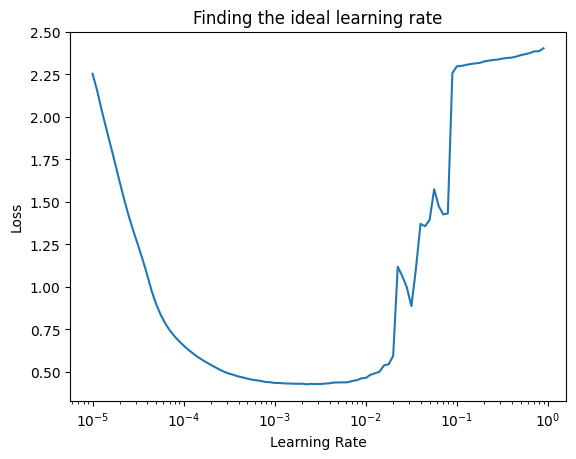

In [30]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-5 * (10**(tf.range(100)/20))
plt.semilogx(lrs, history_5.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

## Tweak another model

We now have clarity on learning rate.

Let's train a model with the new learning rate, and for longer.

In [37]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# 2. Compile the model
model_6.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                metrics=["accuracy"])

# 3. Fit the model
history_6 = model_6.fit(train_data_norm,
                        tf.one_hot(train_labels, depth=10),
                        epochs=40,
                        validation_data=(test_data_norm, tf.one_hot(test_labels, depth=10)))

Epoch 1/40
1875/1875 [==============================] - 8s 3ms/step - loss: 1.8511 - accuracy: 0.3280 - val_loss: 1.4000 - val_accuracy: 0.4673
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1374 - accuracy: 0.5595 - val_loss: 0.9686 - val_accuracy: 0.6192
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8646 - accuracy: 0.6568 - val_loss: 0.8259 - val_accuracy: 0.6744
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7728 - accuracy: 0.6983 - val_loss: 0.7624 - val_accuracy: 0.7055
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7218 - accuracy: 0.7286 - val_loss: 0.7197 - val_accuracy: 0.7371
Epoch 6/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6849 - accuracy: 0.7470 - val_loss: 0.6886 - val_accuracy: 0.7511
Epoch 7/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6567 - accuracy: 0.7620 - val_loss: 0.6645 - val_accuracy:

In [38]:
model_6.evaluate(test_data_norm, tf.one_hot(test_labels, depth=10))

313/313 [==============================] - 1s 3ms/step - loss: 0.5221 - accuracy: 0.8197


[0.5220759510993958, 0.8197000026702881]

Text(0.5, 1.0, 'Model_6 Loss Curves')

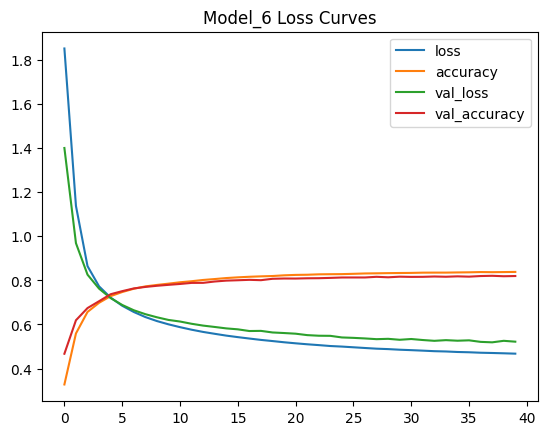

In [43]:
# Plot the loss curves
pd.DataFrame(history_6.history).plot()
plt.title("Model_6 Loss Curves")

## Tweak the model

So the results are much better. However, the model is still not performing well enough.

Let's tweak the model. This time we will again change the structure of the neural network.

In [44]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# 2. Compile the model
model_7.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                metrics=["accuracy"])

# 3. Fit the model
history_7 = model_7.fit(train_data_norm,
                        tf.one_hot(train_labels, depth=10),
                        epochs=40,
                        validation_data=(test_data_norm, tf.one_hot(test_labels, depth=10)))

Epoch 1/40
1875/1875 [==============================] - 9s 4ms/step - loss: 0.9148 - accuracy: 0.6921 - val_loss: 0.6067 - val_accuracy: 0.7985
Epoch 2/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5383 - accuracy: 0.8202 - val_loss: 0.5241 - val_accuracy: 0.8247
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4737 - accuracy: 0.8408 - val_loss: 0.4917 - val_accuracy: 0.8293
Epoch 4/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4399 - accuracy: 0.8510 - val_loss: 0.4554 - val_accuracy: 0.8444
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4182 - accuracy: 0.8570 - val_loss: 0.4459 - val_accuracy: 0.8466
Epoch 6/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4013 - accuracy: 0.8620 - val_loss: 0.4344 - val_accuracy: 0.8496
Epoch 7/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3874 - accuracy: 0.8666 - val_loss: 0.4369 - val_accuracy:

In [45]:
# Evaluate model_7
model_7.evaluate(test_data_norm, tf.one_hot(test_labels, depth=10))

313/313 [==============================] - 1s 3ms/step - loss: 0.3379 - accuracy: 0.8804


[0.33787551522254944, 0.8804000020027161]

In [46]:
# Let's compare the last to models
model_6.summary(), model_7.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_65 (Dense)            (None, 8)                 6280      
                                                                 
 dense_66 (Dense)            (None, 8)                 72        
                                                                 
 dense_67 (Dense)            (None, 8)                 72        
                                                                 
 dense_68 (Dense)            (None, 8)                 72        
                                                                 
 dense_69 (Dense)            (None, 10)                90        
                                                                 
Total params: 6586 (25.73 KB)
Trainable params: 6586 

(None, None)

Model 7 has far more parameters and fits the data much better. We could improve further, but 88% is the goal accuracy. Let's stick with this instead of gold-plating.

### Recreate the Softmax

In [77]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(0, 10), tf.float32)
A

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.], dtype=float32)>

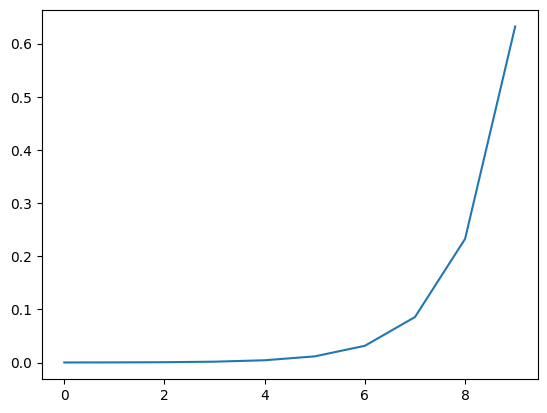

In [78]:
# Create softmax function
def softmax(x):
  return tf.exp(x) / tf.reduce_sum(tf.exp(x))

plt.plot(softmax(A))

## Visualize Fashion-MNIST

1/1 [==============================] - 0s 38ms/step


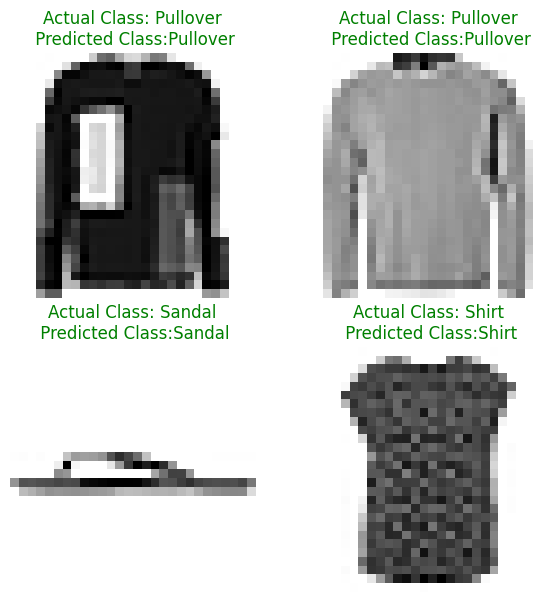

In [107]:
import random

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

def plot_preds():
  plt.figure(figsize=(7, 7))
  for i in range(4):
    plt.subplot(2, 2, i+1)
    t = random.randint(0, 10000)
    plt.imshow(test_data[t],
               cmap="binary")
    plt.axis('off')

    true = class_names[test_labels[t]]
    pred = class_names[np.argmax(model_7.predict(test_data[t].reshape(1, 28, 28)))]

    if true == pred:
      c='g'
    else:
      c='r'
    plt.title(f"Actual Class: {true}\n Predicted Class:{pred}", c=c)

plot_preds()

In [115]:
# Make a function to show an image of a certain class of the fashion MNIST dataset and make a prediction on it. For example, plot 3 images of the T-shirt class with their predictions.

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

def class_viz(x):
  if x not in class_names:
    print("Try again")
  else:
    cat_idx = class_names.index(x)
    i
    print(cat_idx)

class_viz("Dress")

3
